# Manipulación de  archivos de audio mediante python, aproximacióón aplicada

---

*Autor:* **Andrés Manuel Prieto Álvarez**

*Materia:* **Computación Blanda**

---

## Contenidos

*   Introducción
*   Notas preliminares
*   Graficación de un archivo de audio
*   Transformación a frecuencia de un archivo de audio
*   Generación de un archivo de audio
*   Algunas notas
*   Referencias

---

# Introducción

En este documento se dará un ejemplo practico de como usar python para la generación y tratammiento de audio usando librerías de Python como las que se indicará en "Notas preliminares", como parte de esta introducción indicaremos que los archivos que se usarán son todos del formato .wav, esto se debe a que los archivos de esta extensión no tienen su audio comprimido, cosa que si ocurre con los archivos de extensión como .mp3 entre otros, la aproximación que se deja expresada en este paper surge como interpretación de un material brindado por el profesor de computación blanda Gilberto Vargas Cano, en este documento se encuentran notas, sobre la forma de desarrollar graficación de audio en el dominio del tiempo, usando matplotlib, para ello se usará la transformada de Fourier, instrumento usado por las tecnicas de comunicaciones; de modo similar se explicará el método para transformar estas graficas expresadas en el dominio de la frecuencia; por último, se dará muestra del como generar archivos de audio.



# Notas preliminares

Para la aplicación practica de lo que se expresará en este Paper, usaremos las siguientes librerías:

* Numpy: Nos ayudará con la manipulación de la información, la generación de las estructuras de programación y algebra lineal necesarias para el tratamiento de la información.

* Matplotlib.pyplot: Nos ayudará con la generación de las graficas que representarán nuestra información

* Scipy.io: Con esta librería realizaremos la manipulación de los archivos de audio, como tambien la generación de los mismo usando una de sus funciones, puntualmente wav.write

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav

## Variables iniciales

En este apartado agregaremos las vavirables que se usaran en los siguientes modelos, se recogen los datos y posteriormente se normalizan para poder realizar graficas

In [91]:
# Lectura de archivos de audio:

# Leemos el archivo que vamos a graficar en el dominio del tiempo
frecuencia_sonido, senial_sonido = wav.read('sonido_aleatorio.wav')

# Leemos el archivo que vamos a graficar en el dominio de la frecuencia
frecuencia_palabra, senial_palabra = wav.read('palabra_hablada.wav')

In [92]:
# Mostrar los parámetros de la grafica del dominio del tiempo
print('Tipo de dato:', senial_sonido.dtype)
print('Tamaño señal:', senial_sonido.shape[0])
print('Frecuencia de muestreo: ', frecuencia_sonido)
print('Duracción de la señal:', round(senial_sonido.shape[0] / float(frecuencia_sonido), 2), 'seconds')

Tipo de dato: int16
Tamaño señal: 132300
Frecuencia de muestreo:  44100
Duracción de la señal: 3.0 seconds


In [93]:
# Mostrar los parámetros de la grafica del dominio de la frecuencia
print('Tipo de dato:', senial_palabra.dtype)
print('Tamaño señal:', senial_palabra.shape[0])
print('Frecuencia de muestreo:', frecuencia_palabra)
print('Duracción de la señal:', round(senial_palabra.shape[0] / float(frecuencia_palabra), 2), 'seconds')

Tipo de dato: int16
Tamaño señal: 3251
Frecuencia de muestreo: 8000
Duracción de la señal: 0.41 seconds


In [94]:
# Normalización de los datos (Las señales):

# Normalización del archivo de sonido
senial_sonido = senial_sonido / np.power(2, 15)

# Normalización del archivo de palabra
senial_palabra = senial_palabra / np.power(2, 15) 

# Graficación de un archivo de audio

En estes apartado se describirá como transformar archivos de audio en una expresión matematica graficable en el plano carterisano, para esto se usarán las ecuacuiones respectivas a ondas, es decir; adaptamos los datos de entrada (senial_sonido) tomando los 50 primeros valores y construimos un eje del tiempo, para ello usamos el facto de 1000 que nos dará la medida del tiempo (En ms); al tener esto listo, podemos graficar

In [122]:
# Extraer los primeros 50 valores
senial_sonido = senial_sonido[:50]

In [123]:
# Construir el eje de tiempo en milisegundos
eje_del_tiempo = 1000 * np.arange(0, len(senial_sonido), 1) / float(frecuencia_sonido)

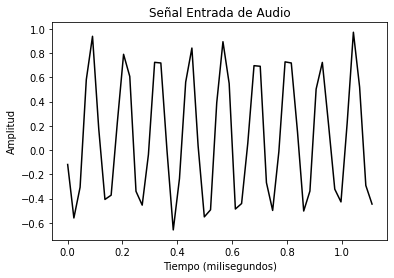

In [124]:
# Dibujar la señal de audio
plt.plot(eje_del_tiempo, senial_sonido, color='black')
plt.title('Señal Entrada de Audio')
plt.xlabel('Tiempo (milisegundos)')
plt.ylabel('Amplitud')
plt.show()

# Transformación a frecuencia de un archivo de audio

Para la transformación al dominio de la frecuencia, necesitamos de una serie de datos necesarios para poder realizar las graficas correspondientes. Usando el archivo de palabra sacamos la longitud de la palabra (La cantidad de datos), la mitad de la longitud y la frecuencia de la señal, usando la transformada de Fourier; con esta información ya obtenida se hace necesario realizar algunos ajustes, el primero es normalizar la información y el segundo es ajustar la información en los casos pares e impares de la información que se está tratando; para graficar se necesita extraer el valor de la potencia de la señal que corresponde con el eje Y (En dB), además de construir el eje X (kHz)

In [98]:
# Extraer la longitud de la señal de audio
longitud_senial = len(senial_palabra)

In [99]:
# Extraer la mitad de la longitud
mitad_longitud = np.ceil((longitud_senial + 1) / 2.0).astype(np.int)

In [101]:
# Aplicar la Transformada de Fourier
frecuencia_senial = np.fft.fft(senial_palabra)

In [131]:
# Grafiquemos la información anterior
print("Longitud de la señal: ", longitud_senial)
print("Mitad de la longitud: ", mitad_longitud)
print("Frecuencia de la señal: ", frecuencia_senial)

Longitud de la señal:  3251
Mitad de la longitud:  1626
Frecuencia de la señal:  [3.21469717e-11 6.57864862e-11 6.22509348e-11 ... 2.54366243e-10
 3.36502390e-10 6.60015218e-10]


In [102]:
# Normalización
frecuencia_senial = abs(frecuencia_senial[0:mitad_longitud]) / longitud_senial

In [103]:
# Cuadrado
frecuencia_senial **= 2

In [132]:
# Extrae la longitud de la señal de frecuencia transformada
longitud_frecuencia_tranformada = len(frecuencia_senial)

In [133]:
# Ajustar la señal para casos pares e impares
if longitud_senial % 2:
    frecuencia_senial[1:longitud_frecuencia_tranformada] *= 2
else:
    frecuencia_senial[1:longitud_frecuencia_tranformada-1] *= 2

In [134]:
# Extraer el valor de potencia en dB
potencia_senial = 10 * np.log10(frecuencia_senial)

In [135]:
# Construir el eje X
eje_x = np.arange(0, mitad_longitud, 1) * (frecuencia_de_muestreo / longitud_senial) / 1000.0

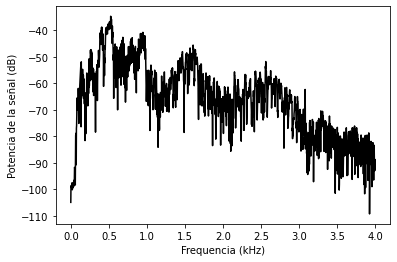

In [136]:
# Graficar la figura
plt.figure()
plt.plot(eje_x, potencia_senial, color='black')
plt.ylabel('Potencia de la señal (dB)')
plt.xlabel('Frequencia (kHz)')
plt.show()

# Generación de un archivo de audio

Finalmente, para poder generar archivos de audio necesitamos de las variables que se han calculado anteriormente (No todas), junto con algunos valores extra que se hacen necesarios para la respectiva función de SciPy (wav.write) y el que será el archivo que albergue la salida de nuestra función, por lo que iniciamos por este que para el caso será 'audio_generado.wav', siguiendo la extensión que hemos usado a lo largo de todo este paper; especificamos los parametros del audio a generar junto a unos valores limite, que serán los "topes". Para el modelo se genera un espacio lineal "t" en la que agregaremos algunos de los datos que declaramos al inicio y sobre este agregamos una señal usando la funsión seno; posteriormente agregamos una señal de ruido sobre la misma frecuencia que declaramos anteriormente, para terminar con la configuración de nuestro archivo, hay que añadir a nuestra señal un factor de escalamiento que (Si se ha prestado atención) será de 16 bits como con las señales anteriores, aunque hay que normalizar la señal primero. Con estos todo esto realizado, generamos el archivo declaranco en write() como primero parametro la variable que contiene el nombre del archivo de salida.

Veamos lo que hemos hecho; graficaremos como se hizo en el primer apartado "Graficación de un archivo de audio" solo que para este caso tomaremos los 200 primeros valors inciales en lugar de los 50 que se tomó en el ejemplo anterior

In [109]:
# Archivo de salida en el cual se grabará el audio 
archivo_salida = 'audio_generado.wav'

In [110]:
# Especificar los parámetros del audio
frecuencia_muestreo = 44100  # en Hz
frecuencia_tono = 784 # en Hz
duracion = 4  # en segundos

# Valores limite
valor_minimo = -4 * np.pi
valor_maximo = 4 * np.pi

In [111]:
# Generar la señal de audio
t = np.linspace(valor_minimo, valor_maximo, duracion * frecuencia_muestreo)
senial = np.sin(2 * np.pi * frecuencia_tono * t)

In [112]:
# Agregar algún ruido a la señal
ruido = 0.5 * np.random.rand(duracion * frecuencia_muestreo)
senial += ruido

In [113]:
# Escalar a valores enteros de 16 bits
factor_escalamiento = np.power(2, 15) - 1
senial_normalizada = senial / np.max(np.abs(senial))
senial_escalada = np.int16(senial_normalizada * factor_escalamiento)

In [114]:
# Almacenar la señal de audio en el archivo de salida 
wav.write(archivo_salida, frecuencia_muestreo, senial_escalada)

In [115]:
# Extraer los primeros 200 valores de la señal de audio
senial = senial[:200]

In [116]:
# Construir el eje del tiempo en milisegundos
eje_tiempo = 1000 * np.arange(0, len(senial), 1) / float(frecuencia_muestreo) 

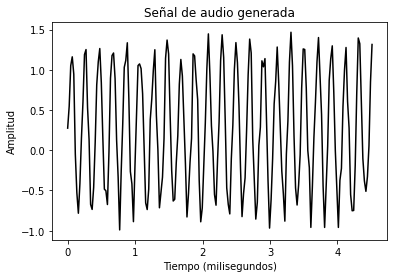

In [117]:
# Graficar la señal de audio
plt.plot(eje_tiempo, senial, color='black')
plt.xlabel('Tiempo (milisegundos)')
plt.ylabel('Amplitud')
plt.title('Señal de audio generada')
plt.show()


# Algunas notas

Analizando el contenido vemos que la generación de audio y la graficación en diferentes dominios, es relativamente sencilla; al analizar el codigo, vemos que lo más complicado de estos modelos es el analisis matematico y la forma de llegar a estos es lo más complicado.

# Referencias

*   Gilberto Vargas Cano. (2021). 01-Graficar-Audio.ipynb. Domingo 25 de abril de 2021, de Universidad Tecnologica de Pereira Sitio web: https://colab.research.google.com/drive/1U8FReSAdWrT8itlBz4CKSvM5lLpCyBQB?authuser=1&usp=drive_open

*   Gilberto Vargas Cano. (2021). 02-Transformar-A-Frecuencia.ipynb. Domingo 25 de abril de 2021, de Universidad Tecnologica de Pereira Sitio web: https://colab.research.google.com/drive/1-lHDilJZ4ITeOt6lZhfLynLXAbjkhmzj?authuser=1&usp=drive_open

*   Gilberto Vargas Cano. (2021). 03-Generar_Audio.ipynb. Domingo 25 de abril de 2021, de Universidad Tecnologica de Pereira Sitio web: https://colab.research.google.com/drive/1RJSinto5rDgcl2vGW3rcaaOmN9kmqVCO?authuser=1&usp=drive_open

*   The SciPy community. (2008-2020). NumPy v1.20 Manual. Lunes 26 de abril de 2021, de numpy.org Sitio web: https://numpy.org/doc/stable/

*   John Hunter, Darren Dale, Eric Firing, Michael Droettboom and the Matplotlib development team (2002-2012). The Matplotlib development team (2012-2021). matplotlib.pyplot. Lunes 26 de abril de 2021, de matplotlib.org Sitio web: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html

*   The SciPy community. (2008-2021). scipy.io.wavfile.read. Lunes 26 de abril de 2021, de SciPy.org Sitio web: https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html

*   The SciPy community. (2008-2021). scipy.io.wavfile.write. Lunes 26 de abril de 2021, de SciPy.org Sitio web: https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.write.html
